[1160.203333, 1460.943333, 289.49, 1339.39, 1244.616667, 872.0, 1129.76, 1136.763333, 1192.656667, 903.796667, 1507.22, 1120.24, 1178.926667, 1373.786667, 16.093333, 1299.766667, 1451.24, 115.02, 1248.806667, 1207.213333, 1118.77]


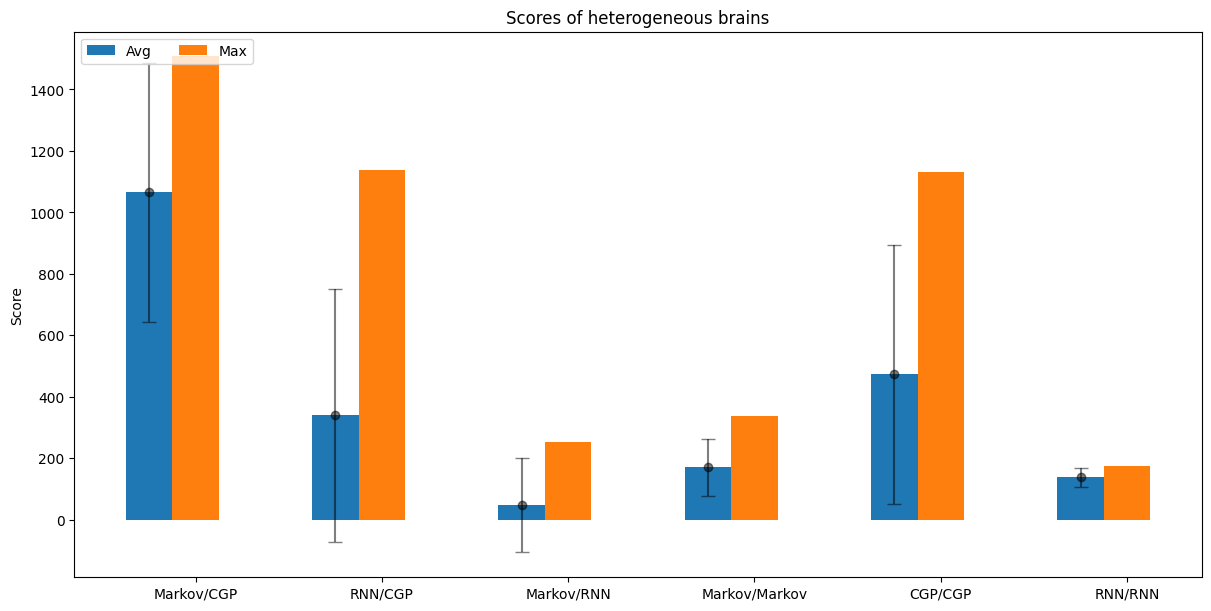

In [15]:
#F2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import statistics
import seaborn as sns

def get_scores(path):
    scores = []
    for dirpath, dirnames, filenames in os.walk(path):
        if "pop.csv" in filenames and "/001" not in dirpath:
            file_path = os.path.join(dirpath, "pop.csv")
            df = pd.read_csv(file_path)
            scores.append(df["score_AVE"].iloc[-1])
    return scores


markovCGP_scores = get_scores("postcanada/r150HeteroHomo/r150all_C0__CMR_0.0__IA1_10__BRN_Markov__BRN2_CGP")
RNNCGP_scores = get_scores("postcanada/r150HeteroHomo/r150all_C2__CMR_0.0__IA1_10__BRN_RNN__BRN2_CGP")
markovRNN_scores = get_scores("postcanada/r150HeteroHomo/r150all_C4__CMR_0.0__IA1_10__BRN_Markov__BRN2_RNN")
markovMarkov_scores = get_scores("postcanada/r150Split/r150split_C0__CMR_0.0__IA1_10__BRN_Markov__BRN2_Markov")
CGPCGP_scores = get_scores("postcanada/r150Split/r150split_C4__CMR_0.0__IA1_10__BRN_CGP__BRN2_CGP")
RNNRNN_scores = get_scores("postcanada/r150Split/r150split_C2__CMR_0.0__IA1_10__BRN_RNN__BRN2_RNN")
print(markovCGP_scores)

brains = ("Markov/CGP", "RNN/CGP", "Markov/RNN", "Markov/Markov", "CGP/CGP", "RNN/RNN")
avg_scores = (
    sum(markovCGP_scores) / len(markovCGP_scores),
    sum(RNNCGP_scores) / len(RNNCGP_scores),
    sum(markovRNN_scores) / len(markovRNN_scores),
    sum(markovMarkov_scores) / len(markovMarkov_scores),
    sum(CGPCGP_scores) / len(CGPCGP_scores),
    sum(RNNRNN_scores) / len(RNNRNN_scores)
)
std_devs = (
    statistics.stdev(markovCGP_scores),
    statistics.stdev(RNNCGP_scores),
    statistics.stdev(markovRNN_scores), 
    statistics.stdev(markovMarkov_scores),
    statistics.stdev(CGPCGP_scores),
    statistics.stdev(RNNRNN_scores)
)

scores = {
    'Avg': avg_scores,
    'Max': (
        max(markovCGP_scores),
        max(RNNCGP_scores),
        max(markovRNN_scores), 
        max(markovMarkov_scores),
        max(CGPCGP_scores),
        max(RNNRNN_scores)
    ),
}

x = np.arange(len(brains))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
ax.errorbar(x, avg_scores, yerr=std_devs, fmt='o', color='black', alpha=0.5, capsize=5, zorder=2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores of heterogeneous brains')
ax.set_xticks(x + width, brains)
ax.legend(loc='upper left', ncols=3)

plt.show()